# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

## Answer to the questions

In [1]:
import pandas as pd
import numpy as np
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print (df.describe())
df.head()

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### 1) Is the distribution of body temperatures normal?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import numpy as np
import statsmodels.api as sm
import pylab

#### Option-1

In [4]:
# Computing the mean and median of the body temperature 

mean_BTpopulation = 98.6
sample_size = 130
mean_BTsample = 98.249231
std_BTsample =0.733183
print ('median_BTsample = %0.4f' % df['temperature'].median())
print ('mean_BTsample = %0.4f' % df['temperature'].mean())
print('number of male =%d' % len(df[df['gender'] == 'M']))
print('number of female =%d'% len(df[df['gender'] == 'F']))

median_BTsample = 98.3000
mean_BTsample = 98.2492
number of male =65
number of female =65


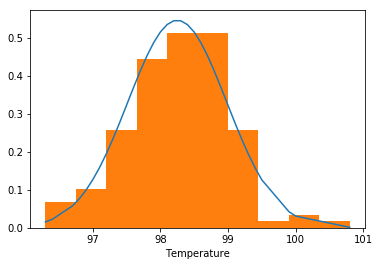

In [5]:
# Sample distribution of sampling mean for the body temperature
nbt = list(df['temperature'])
nbt.sort()
hmean = np.mean(nbt)
hstd = np.std(nbt)
pdf = stats.norm.pdf(nbt, hmean, hstd)

plt.plot(nbt, pdf)
plt.hist(nbt,normed=True)
plt.xlabel('Temperature')

plt.show()

#### Option-2

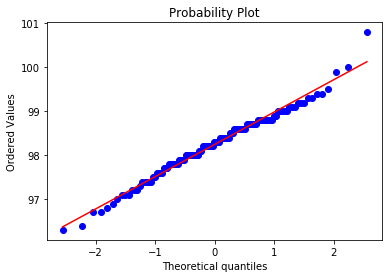

In [6]:
# QQ-plot to test the normal distribution

stats.probplot(df['temperature'], dist="norm", fit=True, plot=pylab)
pylab.show()

#### Option-3

In [7]:
# testing the null hypothesis that the body temperature was sampled from population that has a normal distribution. 
# Let us assume that our significance level is 0.05.

# The Shapiro-Wilk normality test is reputadely more well suited to smaller datasets.

temp = df['temperature']

shapiro_norm = scipy.stats.shapiro(temp)

matrix_nd = pd.DataFrame.from_dict({'Test Statistic':shapiro_norm[0], 'p-value':shapiro_norm[1]}, orient='index')
matrix_nd

,0
Test Statistic,0.986577
p-value,0.233168


Option-1 [histogram plot]: shows the body temperatures has a normal distribution.

Option-2 [QQ-plot]: indicates the distribution of the body temperatures is normal.

Option-3 [Shapiro test]: Since the p-value (0.23) is lower than our test-statistic, we have enough evidence not to reject the null hypothesis at the 0.05 significance level. That indicates the distribution of the body temperatures is normal.

#### 2) Is the sample size large? Are the observations independent?

A) The mean and median of the sample data seem to be very close, which may refer to symmetric data. There is also no evidence that the population data is not normally distributed [see the above results]. A sample size of 30 is taken as sufficient based on the conditions of CLT). As we have a sample size of 130, we can say the sample size is large enough.

B) Are the observations independent? One of the conditions for CLT is to honor the randomization conditions and sample independency. Based on the above analysis, the distribution of sample mean seems to be normally distributed, which may indirectly indicate random sampling from the population with replacement [the observations are independent]. Also, there are equal number of males and females in the sample. We are assuming here that they most likely use unique thermometer for each person. If someone used one thermometer for all individuals, it is hard to say that the observations were independent.

#### 3) Is the true population mean really 98.6 degrees F?

The question seems to be one sample test because it is asking whether the population mean is significantly different or not from the standard value (in this case, 98.6). It is also appropriate to use a Z-statistic, as the sample size is greater than 30. Let us test the hypothesis that the true population mean is 98.6. 

Assume null hypothesis, Ho: mean_pop = 98.6 and alternative hypothesis, Ha: mean_pop <> 98.6

mean_BTpopulation = 98.6

sample_size = 130

mean_BTsample = 98.249231

std_BTsample =0.733183

Z = sample mean - population mean/(std_population/sqr(number of sample))

As our sample size is greater than 30, we can substitue the std_population by std_mean.Let take the confidence interval of 95%. In the Z-table, we will look the z-score for 97.5%, which is 1.96.

In [8]:
# Estimating population mean using the Z-score

# Z > -1.96 and Z < 1.96, and from the above formula

meanTemp = df['temperature'].mean()
stdTemp = df['temperature'].std()
n=130
z=1.96

population_mean_LB = meanTemp - ((z)*(stdTemp/math.sqrt(n)))
population_mean_UB = meanTemp + ((z)*(stdTemp/math.sqrt(n)))

print('The estimated lower value of the mean body temperature of the population = %0.2f' % population_mean_LB)
print('The estimated upper value of the mean body temperature of the population = %0.2f' % population_mean_UB)

The estimated lower value of the mean body temperature of the population = 98.12
The estimated upper value of the mean body temperature of the population = 98.38


Based on the above result, there is 95% chance that the true population mean for the body temperature lies between 98.12 and 98.38, as opposed to given value of 98.60 degrees F. Therefore, we reject the null hypothesis and go foward with the alternative one. 

#### 4) At what temperature should we consider someone's temperature to be "abnormal"?

The confidence interval of 95 % was taken, and the Z-score for that CI is 1.96. The margin of error can be estimated by multiplying Z-score with standard deviation of the sampling distribution of sampling mean. From the results below, the range for normal body temperature seems to be between 98.1227 and 98.3758 degrees F.

In [9]:
margin_error = 1.96 * (0.733183/math.sqrt(130))
print('The margin error (E) = %0.4f' % margin_error)
print('Lower bound of the population mean = %0.4f' % (mean_BTsample-margin_error))
print('Upper bound of the population mean = %0.4f' % (mean_BTsample + margin_error))

The margin error (E) = 0.1260
Lower bound of the population mean = 98.1232
Upper bound of the population mean = 98.3753


#### 5) Is there a significant difference between males and females in normal temperature?

To answer this question, I prefer to use the paired two sample Z-test because we are examing two groups for the same matter [body temperature]. Let us do the hypothesis test to figure out whether there is a difference in normal body temperature between male and female or not.

In [10]:
# Assume null hypothesis, Ho: mean_pop_male = mean_pop_female
# alternative hypothesis, Ha: mean_pop_male is different from mean_pop_female

# mean_pop_male

male_temp = df[df['gender'] == 'M']
female_temp = df[df['gender'] == 'F']

# For males
mean_male = male_temp['temperature'].mean()
std_male = male_temp['temperature'].std()

# For females
mean_female = female_temp['temperature'].mean()
std_female = female_temp['temperature'].std()

In [11]:
# There are 65 male and 65 female observations. 
#significance level: 5%

# Assuming mean_male = mean_female
no_diff = 0 

# sample mean difference
mean_diff = mean_male-mean_female

# Estimate Z-score
Z_score = (mean_diff - no_diff)/((std_male/math.sqrt(65)) + (std_female/math.sqrt(65)))
print('Estimated Z-score = %0.4f' % Z_score)

# P-value at the estimated Z-score (0.0526) for two-tailed hypothesis
P_value_Zscore = 0.0526 * 2
print ('P-value = %0.4f' % P_value_Zscore)


Estimated Z-score = -1.6168
P-value = 0.1052


We fail to reject the null hypothesis, since the P-value of 0.1052 is greater than our significant level of 0.05. Therefore, there is no evidence that there is a significant difference between mean body temperature of males and females. 

After conducting the above analysis, can we still say that the value of 98.6 degrees F statistically correct? The sample size and its distribution seem to be reasonable and symmetric respectively. The gender proportion of the sample is also acceptable. The population mean lies in the range of 98.12 - 98.38 which exludes the value of 98.60 degree F. The mean body temperature for male and female did not show any evidence for any significant difference. Both results are based on the 95% confidence interval. The difference between statistically calculated mean of the body temperature and the standard value is very small. Statistically speaking, the 98.6 value is not correct, as it is out of the range of the possible values. Therefore there is a 95% likely chance that  true normal human body temperature lies between 98.12 - 98.38. 